# Notebook - Electron Plotting

Let's first load the libraries:

In [1]:
import os
import time

import hist
import json
import matplotlib.pyplot as plt
import mplhep as hep
from hist.intervals import ratio_uncertainty
import matplotlib as mpl
import numpy as np
import pickle
from collections import OrderedDict

## Plots

Finally, let's make some simple plots:

In [2]:
with open("histograms.pkl", "rb") as f:
    h2 = pickle.load(f)
    print(h2.keys())

dict_keys(['neles', 'H_pt', 'nbjets', 'ele_pt', 'jets_eta', 'sumbjets_pt', 'Hratio_pt', 'jets_pt', 'ele_eta', 'njets'])


In [3]:
### list of bkgs to plot 
# dictBkgs stands for Dictionary of Backgrounds
dictBkgs = OrderedDict()
dictBkgs["ttbar"] = { "color" : "#cc0000", "label" : "$t\\bar{t}$" }
dictBkgs["wjets"] = { "color" : "#33cc33", "label" : "EW" }
dictBkgs["single_top_tW"] = { "color" : "cyan", "label" : "tW" }
#dictBkgs["single_top_s_chan"] = { "color" : "green", "label" : "t s-channel" }
#dictBkgs["single_top_t_chan"] = { "color" : "lightgreen", "label" : "t t-channel" }


bkgs = list(dictBkgs.keys())[::-1] #list that contains the names ttbar, wjets, single_top_tW 
bkgs_colors = [ col["color"] for i, col in dictBkgs.items() ][::-1]
bkgs_label = [ col["label"] for i, col in dictBkgs.items() ][::-1]

/tmp/ipykernel_1502/4145191310.py:36: RuntimeWarning: invalid value encountered in true_divide
  hep.histplot((data.values()-tot.values())/tot.values(), tot.axes[0].edges, yerr=np.sqrt(data.values())/tot.values(),
/tmp/ipykernel_1502/4145191310.py:41: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,10e8)


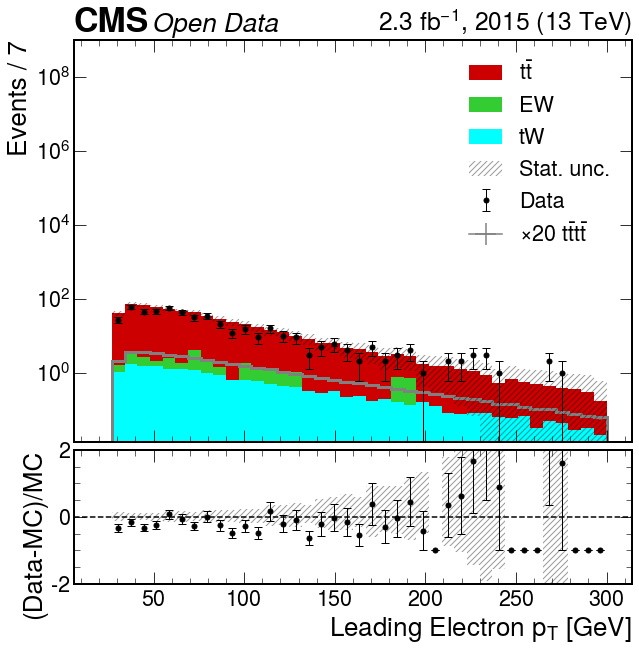

In [8]:
### Run this cell twice to load the CMS style properly
def plotHisto( histName = "ele_pt", xlabel = "Leading Electron $p_{T}$ [GeV]", rebinFactor = 7, 
                  xmin = 20j, xmax = 300j, mcFactor = 0.05, xlog=False):

    data = h2[histName][ xmin:xmax:hist.rebin(rebinFactor), "data", "nominal"]
    hists = [] 
    tot = data.copy()
    tot.reset()
    for ibkg in bkgs:
        hists.append( (mcFactor*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), ibkg, "nominal"]) )
        tot += (mcFactor*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), ibkg, "nominal"])
    
    #SIGNAL
    signal = 20*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), "tttt", "nominal"] #signal is multiplied by 20

    fig, (ax, rax) = plt.subplots(2, 1, gridspec_kw=dict(height_ratios=[3, 1], hspace=0.03), sharex=True)
    hep.cms.label("Open Data", ax=ax, data=True, lumi=2.3, year=2015) #, rlabel="2.3 $\mathrm{fb^{-1}}$, 2015 (8 TeV)")
    plt.style.use(hep.style.CMS)

    hep.histplot(data, ax=ax, histtype='errorbar', color='k', capsize=4, yerr=True, label="Data")
    hep.histplot(hists, ax=ax, stack=True, histtype='fill', color = bkgs_colors, label = bkgs_label)
    hep.histplot(signal, ax=ax, histtype='step', color='gray',  linewidth = 3, label="$\\times 20$ $t\\bar{t}t\\bar{t}$")

    errps = {'hatch':'////', 'facecolor':'none', 'lw': 0, 'color': 'k', 'alpha': 0.4}
    ax.stairs(
        values = tot.values() + np.sqrt(tot.values()),
        baseline = tot.values() - np.sqrt(tot.values()),
        edges = data.axes[0].edges, **errps, label='Stat. unc.')
    if xlog: ax.set_yscale("log")
    ax.legend()
    
    yerr = ratio_uncertainty(data.values(), tot.values(), 'poisson')
    #rax.stairs(1+yerr[1], edges=tot.axes[0].edges, baseline=1-yerr[0], **errps)
    rax.stairs(values= yerr[1], baseline=-yerr[0], edges=tot.axes[0].edges, **errps)
    ## hep.histplot... plots the errors in the secondary plot
    hep.histplot((data.values()-tot.values())/tot.values(), tot.axes[0].edges, yerr=np.sqrt(data.values())/tot.values(),
        ax=rax, histtype='errorbar', color='k', capsize=4, label="Data")


    rax.axhline(0, ls='--', color='k')
    ax.set_ylim(0,10e8)
    ### more labels
    plt.xlabel(xlabel)
    ax.set_ylabel(f"Events / {rebinFactor}")
    rax.set_ylabel("(Data-MC)/MC")
    rax.set_ylim(-2, 2) 
    #plt.ylim(-10e-1,10e8)
    #plt.savefig('electronpt.png')
    plt.show()
plotHisto(xlog=True)

In [7]:
#plotHisto(histName = "neles", xlabel = "Number of Electrons", rebinFactor = 1, xmin = 0j, xmax = 10j, mcFactor = 0.05)

/tmp/ipykernel_661/327632512.py:37: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,10e8)


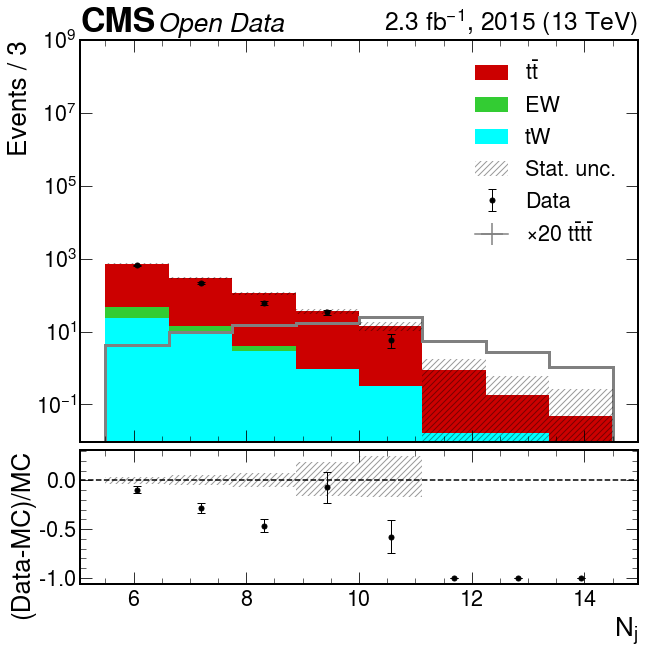

In [10]:
def plotHisto( histName = "njets", xlabel = "$N_j$", rebinFactor = 3,
              xmin = 5.5j, xmax = 14.5j, mcFactor = 0.05, xlog=False
             ):

    data = h2[histName][ xmin:xmax:hist.rebin(rebinFactor), "data", "nominal"]
    hists = [] 
    tot = data.copy()
    tot.reset()
    for ibkg in bkgs:
        hists.append( (mcFactor*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), ibkg, "nominal"]) )
        tot += (mcFactor*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), ibkg, "nominal"])
    signal = 20*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), "tttt", "nominal"] #signal is multiplied by 20

    fig, (ax, rax) = plt.subplots(2, 1, gridspec_kw=dict(height_ratios=[3, 1], hspace=0.03), sharex=True)
    hep.cms.label("Open Data", ax=ax, data=True, lumi=2.3, year=2015) #, rlabel="2.3 $\mathrm{fb^{-1}}$, 2015 (8 TeV)")
    plt.style.use(hep.style.CMS)

    hep.histplot(data, ax=ax, histtype='errorbar', color='k', capsize=4, yerr=True, label="Data")
    hep.histplot(hists, ax=ax, stack=True, histtype='fill', color = bkgs_colors, label=bkgs_label)
    hep.histplot(signal, ax=ax, histtype='step', color='gray',  linewidth = 3, label="$\\times 20$ $t\\bar{t}t\\bar{t}$")

    errps = {'hatch':'////', 'facecolor':'none', 'lw': 0, 'color': 'k', 'alpha': 0.4}
    ax.stairs(
        values=tot.values() + np.sqrt(tot.values()),
        baseline=tot.values() - np.sqrt(tot.values()),
        edges=data.axes[0].edges, **errps, label='Stat. unc.')
    if xlog: ax.set_yscale("log")
    ax.legend()
    
    yerr = ratio_uncertainty(data.values(), tot.values(), 'poisson')
    rax.stairs(yerr[1], edges=tot.axes[0].edges, baseline=-yerr[0], **errps)
    hep.histplot((data.values()-tot.values())/tot.values(), tot.axes[0].edges, yerr=np.sqrt(data.values())/tot.values(),
        ax=rax, histtype='errorbar', color='k', capsize=4, label="Data")


    rax.axhline(0, ls='--', color='k')
    ax.set_ylim(0,10e8)
    ### more labels
    plt.xlabel(xlabel)
    ax.set_ylabel(f"Events / {rebinFactor}")
    rax.set_ylabel("(Data-MC)/MC")
    #plt.ylim(-10e-1,10e8)
    plt.savefig('JetsNumber.png') #si se pone _ la image no se guarda (NO USAR _)
    plt.show()
    
plotHisto(xlog=True)

/tmp/ipykernel_661/3854970293.py:37: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,10e8)


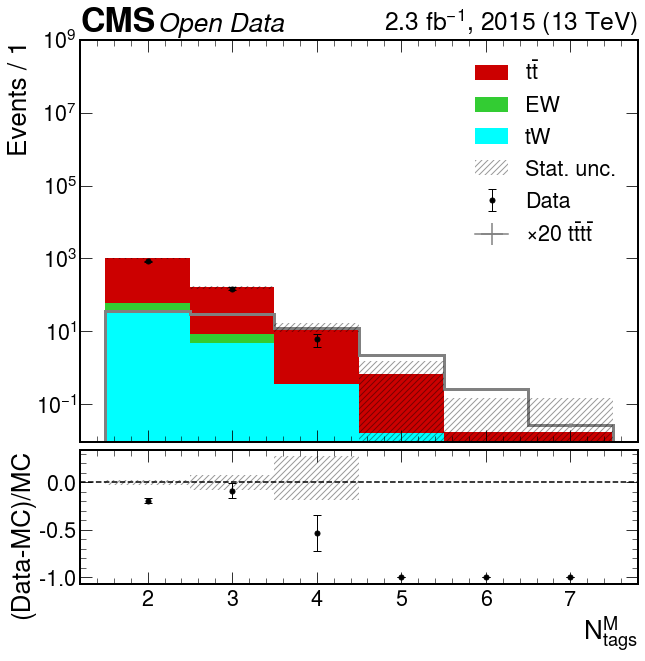

In [12]:
def plotHisto( histName = "nbjets", xlabel = "$N_{tags}^M$", rebinFactor =1,
              xmin = 1.5j, xmax = 7.5j, mcFactor = 0.05, xlog=False
             ):

    data = h2[histName][ xmin:xmax:hist.rebin(rebinFactor), "data", "nominal"]
    hists = [] 
    tot = data.copy()
    tot.reset()
    for ibkg in bkgs:
        hists.append( (mcFactor*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), ibkg, "nominal"]) )
        tot += (mcFactor*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), ibkg, "nominal"])
    signal = 20*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), "tttt", "nominal"] #signal is multiplied by 20

    fig, (ax, rax) = plt.subplots(2, 1, gridspec_kw=dict(height_ratios=[3, 1], hspace=0.03), sharex=True)
    hep.cms.label("Open Data", ax=ax, data=True, lumi=2.3, year=2015) #, rlabel="2.3 $\mathrm{fb^{-1}}$, 2015 (8 TeV)")
    plt.style.use(hep.style.CMS)

    hep.histplot(data, ax=ax, histtype='errorbar', color='k', capsize=4, yerr=True, label="Data")
    hep.histplot(hists, ax=ax, stack=True, histtype='fill', color = bkgs_colors, label=bkgs_label)
    hep.histplot(signal, ax=ax, histtype='step', color='gray',  linewidth = 3, label="$\\times 20$ $t\\bar{t}t\\bar{t}$")

    errps = {'hatch':'////', 'facecolor':'none', 'lw': 0, 'color': 'k', 'alpha': 0.4}
    ax.stairs(
        values=tot.values() + np.sqrt(tot.values()),
        baseline=tot.values() - np.sqrt(tot.values()),
        edges=data.axes[0].edges, **errps, label='Stat. unc.')
    if xlog: ax.set_yscale("log")
    ax.legend()
    
    yerr = ratio_uncertainty(data.values(), tot.values(), 'poisson')
    rax.stairs(yerr[1], edges=tot.axes[0].edges, baseline=-yerr[0], **errps)
    hep.histplot((data.values()-tot.values())/tot.values(), tot.axes[0].edges, yerr=np.sqrt(data.values())/tot.values(),
        ax=rax, histtype='errorbar', color='k', capsize=4, label="Data")


    rax.axhline(0, ls='--', color='k')
    ax.set_ylim(0,10e8)
    ### more labels
    plt.xlabel(xlabel)
    ax.set_ylabel(f"Events / {rebinFactor}")
    rax.set_ylabel("(Data-MC)/MC")
    #plt.ylim(-10e-1,10e8)
    plt.savefig('bjetsNumber.png') #si se pone _ la image no se guarda (NO USAR _)
    plt.show()
    
plotHisto(xlog=True)

In [9]:
#plotHisto(histName = "sumbjets_pt", xlabel = "$H_T^{b}$", rebinFactor = 1, xmin = 0j, xmax = 1000j, mcFactor = 0.05)

/tmp/ipykernel_1502/1310556841.py:37: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,10e8)


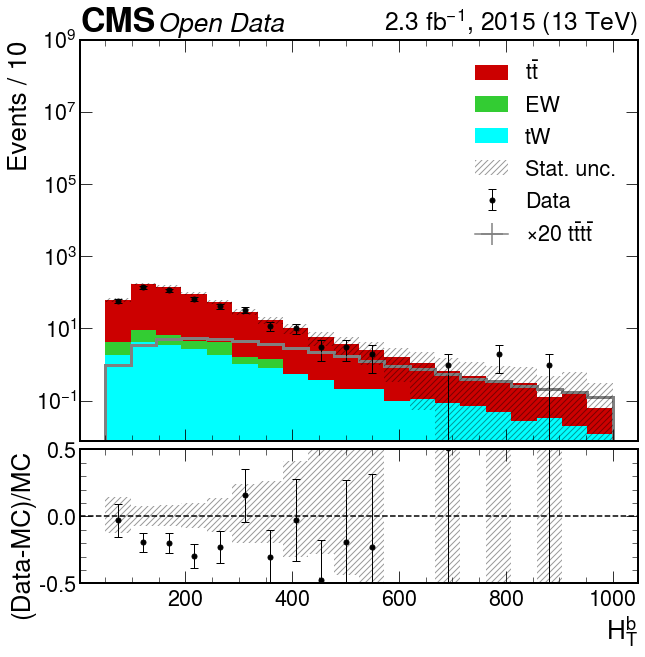

In [12]:
def plotHisto( histName = "sumbjets_pt", xlabel = "$H_T^{b}$", rebinFactor = 10,
              xmin = 0j, xmax = 1000j, mcFactor = 0.05, xlog=False
             ):

    data = h2[histName][ xmin:xmax:hist.rebin(rebinFactor), "data", "nominal"]
    hists = [] 
    tot = data.copy()
    tot.reset()
    for ibkg in bkgs:
        hists.append( (mcFactor*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), ibkg, "nominal"]) )
        tot += (mcFactor*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), ibkg, "nominal"])
    signal = 20*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), "tttt", "nominal"] #signal is multiplied by 20

    fig, (ax, rax) = plt.subplots(2, 1, gridspec_kw=dict(height_ratios=[3, 1], hspace=0.03), sharex=True)
    hep.cms.label("Open Data", ax=ax, data=True, lumi=2.3, year=2015) #, rlabel="2.3 $\mathrm{fb^{-1}}$, 2015 (8 TeV)")
    plt.style.use(hep.style.CMS)

    hep.histplot(data, ax=ax, histtype='errorbar', color='k', capsize=4, yerr=True, label="Data")
    hep.histplot(hists, ax=ax, stack=True, histtype='fill', color = bkgs_colors, label=bkgs_label)
    hep.histplot(signal, ax=ax, histtype='step', color='gray', linewidth = 3, label="$\\times 20$ $t\\bar{t}t\\bar{t}$")

    errps = {'hatch':'////', 'facecolor':'none', 'lw': 0, 'color': 'k', 'alpha': 0.4}
    ax.stairs(
        values=tot.values() + np.sqrt(tot.values()),
        baseline=tot.values() - np.sqrt(tot.values()),
        edges=data.axes[0].edges, **errps, label='Stat. unc.')
    if xlog: ax.set_yscale("log")
    ax.legend()
    
    yerr = ratio_uncertainty(data.values(), tot.values(), 'poisson')
    rax.stairs(yerr[1], edges=tot.axes[0].edges, baseline=-yerr[0], **errps)
    hep.histplot((data.values()-tot.values())/tot.values(), tot.axes[0].edges, yerr=np.sqrt(data.values())/tot.values(),
        ax=rax, histtype='errorbar', color='k', capsize=4, label="Data")


    rax.axhline(0, ls='--', color='k')
    ax.set_ylim(0,10e8)
    ### more labels
    plt.xlabel(xlabel)
    ax.set_ylabel(f"Events / {rebinFactor}")
    rax.set_ylabel("(Data-MC)/MC")
    rax.set_ylim(-0.5,0.5)
    plt.savefig('HTb.png')
    plt.show()
    
plotHisto(xlog=True)

/tmp/ipykernel_550/3748890677.py:37: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,10e8)


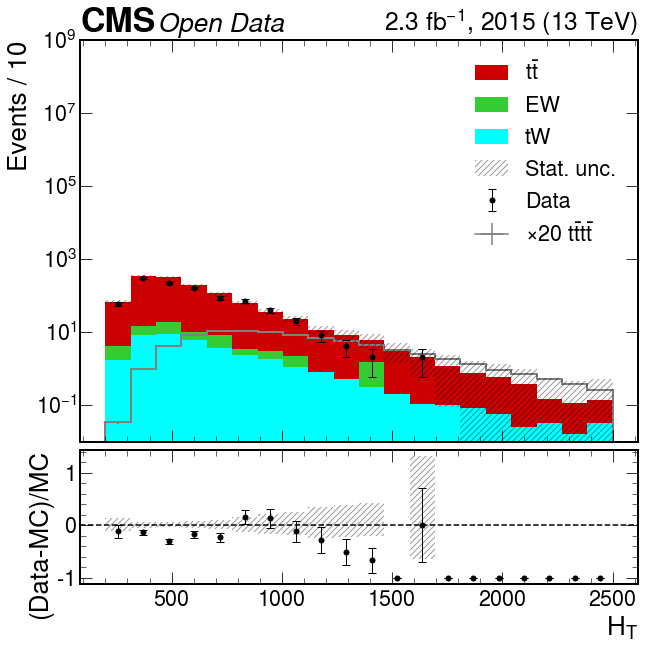

In [6]:
def plotHisto( histName = "H_pt", xlabel = "$H_T$", rebinFactor = 10,
              xmin = 0j, xmax = 2500j, mcFactor = 0.05, xlog=False
             ):

    data = h2[histName][ xmin:xmax:hist.rebin(rebinFactor), "data", "nominal"]
    hists = [] 
    tot = data.copy()
    tot.reset()
    for ibkg in bkgs:
        hists.append( (mcFactor*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), ibkg, "nominal"]) )
        tot += (mcFactor*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), ibkg, "nominal"])
    signal = 20*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), "tttt", "nominal"] #signal is multiplied by 20

    fig, (ax, rax) = plt.subplots(2, 1, gridspec_kw=dict(height_ratios=[3, 1], hspace=0.03), sharex=True)
    hep.cms.label("Open Data", ax=ax, data=True, lumi=2.3, year=2015) #, rlabel="2.3 $\mathrm{fb^{-1}}$, 2015 (8 TeV)")
    plt.style.use(hep.style.CMS)

    hep.histplot(data, ax=ax, histtype='errorbar', color='k', capsize=4, yerr=True, label="Data")
    hep.histplot(hists, ax=ax, stack=True, histtype='fill', color = bkgs_colors, label=bkgs_label)
    hep.histplot(signal, ax=ax, histtype='step', color='gray', linewidth = 2, label="$\\times 20$ $t\\bar{t}t\\bar{t}$")

    errps = {'hatch':'////', 'facecolor':'none', 'lw': 0, 'color': 'k', 'alpha': 0.4}
    ax.stairs(
        values=tot.values() + np.sqrt(tot.values()),
        baseline=tot.values() - np.sqrt(tot.values()),
        edges=data.axes[0].edges, **errps, label='Stat. unc.')
    if xlog: ax.set_yscale("log")
    ax.legend()
    
    yerr = ratio_uncertainty(data.values(), tot.values(), 'poisson')
    rax.stairs(yerr[1], edges=tot.axes[0].edges, baseline=-yerr[0], **errps)
    hep.histplot((data.values()-tot.values())/tot.values(), tot.axes[0].edges, yerr=np.sqrt(data.values())/tot.values(),
        ax=rax, histtype='errorbar', color='k', capsize=4, label="Data")


    rax.axhline(0, ls='--', color='k')
    ax.set_ylim(0,10e8)
    ### more labels
    plt.xlabel(xlabel)
    ax.set_ylabel(f"Events / {rebinFactor}")
    rax.set_ylabel("(Data-MC)/MC")
    #plt.ylim(-10e-1,10e8)
    plt.savefig('HT.png')
    plt.show()
    
plotHisto(xlog=True)

/tmp/ipykernel_1502/3335956127.py:32: RuntimeWarning: invalid value encountered in true_divide
  hep.histplot((data.values()-tot.values())/tot.values(), tot.axes[0].edges, yerr=np.sqrt(data.values())/tot.values(),
/tmp/ipykernel_1502/3335956127.py:37: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,10e8)


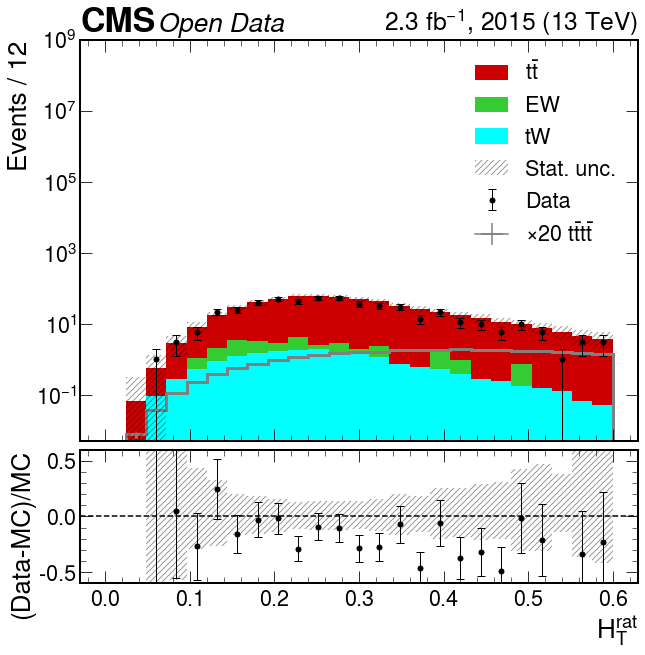

In [16]:
def plotHisto( histName = "Hratio_pt", xlabel = "$H_T^{rat}$", rebinFactor = 12,
              xmin = 0j, xmax = 0.6j, mcFactor = 0.05, xlog=False
             ):

    data = h2[histName][ xmin:xmax:hist.rebin(rebinFactor), "data", "nominal"]
    hists = [] 
    tot = data.copy()
    tot.reset()
    for ibkg in bkgs:
        hists.append( (mcFactor*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), ibkg, "nominal"]) )
        tot += (mcFactor*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), ibkg, "nominal"])
    signal = 20*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), "tttt", "nominal"] #signal is multiplied by 20

    fig, (ax, rax) = plt.subplots(2, 1, gridspec_kw=dict(height_ratios=[3, 1], hspace=0.03), sharex=True)
    hep.cms.label("Open Data", ax=ax, data=True, lumi=2.3, year=2015) #, rlabel="2.3 $\mathrm{fb^{-1}}$, 2015 (8 TeV)")
    plt.style.use(hep.style.CMS)

    hep.histplot(data, ax=ax, histtype='errorbar', color='k', capsize=4, yerr=True, label="Data")
    hep.histplot(hists, ax=ax, stack=True, histtype='fill', color = bkgs_colors, label=bkgs_label)
    hep.histplot(signal, ax=ax, histtype='step', color='gray', linewidth = 3, label="$\\times 20$ $t\\bar{t}t\\bar{t}$")

    errps = {'hatch':'////', 'facecolor':'none', 'lw': 0, 'color': 'k', 'alpha': 0.4}
    ax.stairs(
        values=tot.values() + np.sqrt(tot.values()),
        baseline=tot.values() - np.sqrt(tot.values()),
        edges=data.axes[0].edges, **errps, label='Stat. unc.')
    if xlog: ax.set_yscale("log")
    ax.legend()
    
    yerr = ratio_uncertainty(data.values(), tot.values(), 'poisson')
    rax.stairs(yerr[1], edges=tot.axes[0].edges, baseline=-yerr[0], **errps)
    hep.histplot((data.values()-tot.values())/tot.values(), tot.axes[0].edges, yerr=np.sqrt(data.values())/tot.values(),
        ax=rax, histtype='errorbar', color='k', capsize=4, label="Data")


    rax.axhline(0, ls='--', color='k')
    ax.set_ylim(0,10e8)
    ### more labels
    plt.xlabel(xlabel)
    ax.set_ylabel(f"Events / {rebinFactor}")
    rax.set_ylabel("(Data-MC)/MC")
    rax.set_ylim(-0.6,0.6)
    plt.savefig('HTRatio.png')
    plt.show()
    
plotHisto(xlog=True)

In [9]:
def plotHisto( histName = "H2m_pt", xlabel = "$H_T^{2m}$", rebinFactor = 1,
              xmin = 0j, xmax = 500j, mcFactor = 0.05, xlog=False
             ):

    data = h2[histName][ xmin:xmax:hist.rebin(rebinFactor), "data", "nominal"]
    hists = [] 
    tot = data.copy()
    tot.reset()
    for ibkg in bkgs:
        hists.append( (mcFactor*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), ibkg, "nominal"]) )
        tot += (mcFactor*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), ibkg, "nominal"])
    signal = 20*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), "tttt", "nominal"] #signal is multiplied by 20

    fig, (ax, rax) = plt.subplots(2, 1, gridspec_kw=dict(height_ratios=[3, 1], hspace=0.03), sharex=True)
    hep.cms.label("Open Data", ax=ax, data=True, lumi=2.3, year=2015) #, rlabel="2.3 $\mathrm{fb^{-1}}$, 2015 (8 TeV)")
    plt.style.use(hep.style.CMS)

    hep.histplot(data, ax=ax, histtype='errorbar', color='k', capsize=4, yerr=True, label="Data")
    hep.histplot(hists, ax=ax, stack=True, histtype='fill', color = bkgs_colors, label=bkgs_label)
    hep.histplot(signal, ax=ax, histtype='step', color='gray', linewidth = 3, label="$\\times 20$ $t\\bar{t}t\\bar{t}$")

    errps = {'hatch':'////', 'facecolor':'none', 'lw': 0, 'color': 'k', 'alpha': 0.4}
    ax.stairs(
        values=tot.values() + np.sqrt(tot.values()),
        baseline=tot.values() - np.sqrt(tot.values()),
        edges=data.axes[0].edges, **errps, label='Stat. unc.')
    if xlog: ax.set_yscale("log")
    ax.legend()
    
    yerr = ratio_uncertainty(data.values(), tot.values(), 'poisson')
    rax.stairs(1+yerr[1], edges=tot.axes[0].edges, baseline=1-yerr[0], **errps)
    hep.histplot(data.values()/tot.values(), tot.axes[0].edges, yerr=np.sqrt(data.values())/tot.values(),
        ax=rax, histtype='errorbar', color='k', capsize=4, label="Data")


    rax.axhline(1, ls='--', color='k')
    ax.set_ylim(0,10e8)
    ### more labels
    plt.xlabel(xlabel)
    ax.set_ylabel(f"Events / {rebinFactor}")
    rax.set_ylabel("(Data-MC)/MC")
    #plt.ylim(-10e-1,10e8)
    plt.show()

In [10]:
#plotHisto(xlog=True)

/tmp/ipykernel_1016/2388936039.py:41: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,10e8)


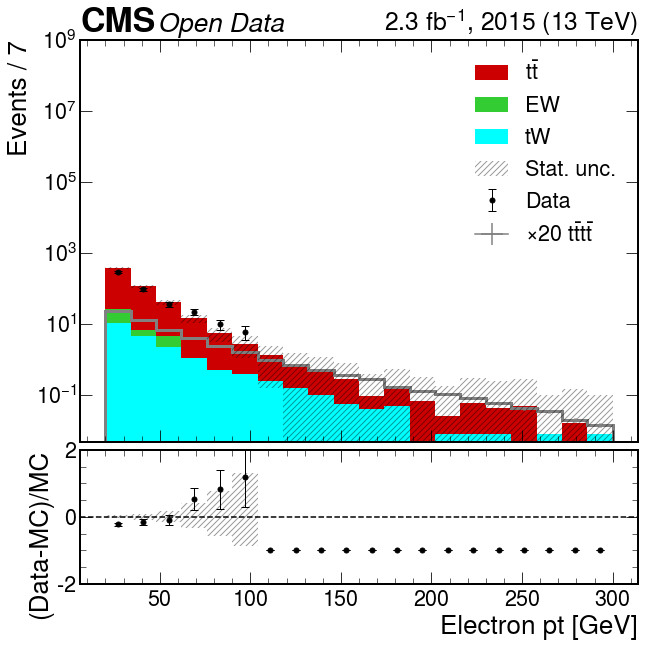

In [20]:
### Run this cell twice to load the CMS style properly
def plotHisto( histName = "norm_njets", xlabel = "Electron pt [GeV]", rebinFactor = 7, 
                  xmin = 20j, xmax = 300j, mcFactor = 0.05, xlog=False):

    data = h2[histName][ xmin:xmax:hist.rebin(rebinFactor), "data", "nominal"]
    hists = [] 
    tot = data.copy()
    tot.reset()
    for ibkg in bkgs:
        hists.append( (mcFactor*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), ibkg, "nominal"]) )
        tot += (mcFactor*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), ibkg, "nominal"])
    
    #SIGNAL
    signal = 20*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), "tttt", "nominal"] #signal is multiplied by 20

    fig, (ax, rax) = plt.subplots(2, 1, gridspec_kw=dict(height_ratios=[3, 1], hspace=0.03), sharex=True)
    hep.cms.label("Open Data", ax=ax, data=True, lumi=2.3, year=2015) #, rlabel="2.3 $\mathrm{fb^{-1}}$, 2015 (8 TeV)")
    plt.style.use(hep.style.CMS)

    hep.histplot(data, ax=ax, histtype='errorbar', color='k', capsize=4, yerr=True, label="Data")
    hep.histplot(hists, ax=ax, stack=True, histtype='fill', color = bkgs_colors, label = bkgs_label)
    hep.histplot(signal, ax=ax, histtype='step', color='gray',  linewidth = 3, label="$\\times 20$ $t\\bar{t}t\\bar{t}$")

    errps = {'hatch':'////', 'facecolor':'none', 'lw': 0, 'color': 'k', 'alpha': 0.4}
    ax.stairs(
        values = tot.values() + np.sqrt(tot.values()),
        baseline = tot.values() - np.sqrt(tot.values()),
        edges = data.axes[0].edges, **errps, label='Stat. unc.')
    if xlog: ax.set_yscale("log")
    ax.legend()
    
    yerr = ratio_uncertainty(data.values(), tot.values(), 'poisson')
    #rax.stairs(1+yerr[1], edges=tot.axes[0].edges, baseline=1-yerr[0], **errps)
    rax.stairs(values= yerr[1], baseline=-yerr[0], edges=tot.axes[0].edges, **errps)
    ## hep.histplot... plots the errors in the secondary plot
    hep.histplot((data.values()-tot.values())/tot.values(), tot.axes[0].edges, yerr=np.sqrt(data.values())/tot.values(),
        ax=rax, histtype='errorbar', color='k', capsize=4, label="Data")


    rax.axhline(0, ls='--', color='k')
    ax.set_ylim(0,10e8)
    ### more labels
    plt.xlabel(xlabel)
    ax.set_ylabel(f"Events / {rebinFactor}")
    rax.set_ylabel("(Data-MC)/MC")
    rax.set_ylim(-2, 2) 
    #plt.ylim(-10e-1,10e8)
    plt.savefig('electronpt.png')
    plt.show()
plotHisto(xlog=True)